In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


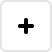
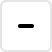
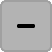
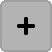
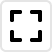
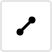
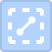
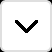
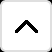
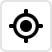
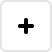
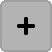
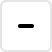
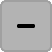
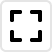
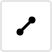
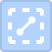
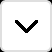
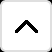
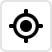

In [2]:
LetsPlot.setup_html()

In [3]:
def get_data(f, n=5, x=None):
    xs = np.linspace(0, n, n + 1) if x is None else x
    ys = [f(elem) for elem in xs]
    return pd.DataFrame(dict(x=xs, y=ys))

In [4]:
id = lambda x: x
exp10 = lambda x: 10**x

test_data = {
    'cubes': get_data(lambda x: x**3),
    'exp2': get_data(lambda x: 2**x),
    'exp10': get_data(exp10),
    'short range': get_data(id, n=2),
    'negative values': get_data(exp10, x=np.linspace(-3, 0, 4)),
    'close values': get_data(id, x=np.linspace(0, 1, 11)),
    'between log': get_data(id, x=[20_000, 80_000]),
    'almost between log': get_data(id, x=[1_000, 100_000]),
    'bigger step': get_data(lambda x: 1000**x, n=3),
    'smaller step': get_data(lambda x: 10**(x / 4), n=8),
}

In [5]:
def get_plot(test_name, df, flip=False):
    p = ggplot(df, aes('x', 'y')) + \
        geom_point() + \
        scale_y_continuous(trans='log10') + \
        ggtitle("test = {0}, flip = {1}".format(test_name, flip))
    if flip:
        p += coord_flip()
    return p

In [6]:
gggrid(list(np.array([
    [get_plot(test_name, df, False), get_plot(test_name, df, True)]
    for test_name, df in test_data.items()
]).flatten()), ncol=2)